# Understanding Video Game Sales

The video game industry is a rapidly changing market influenced by trends, platforms, and consumer preferences. This project aims to analyze historical data to identify patterns that predict game success, helping to inform future strategies. By examining sales trends, platform performance, genres, and the influence of reviews and ratings, we seek to uncover key insights into what drives success in the gaming market. These findings will support data-driven decision-making and optimize efforts for future growth and competitiveness.


Heather Marie Culligan


January 2025


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

Import all needed libraries. Now, to import the dataset.

In [2]:
ddf=pd.read_csv('/datasets/games.csv')

Now, to look at the dataset. 

## Prepare the Data

In [3]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Starting by making all the columns lowercase.

In [4]:
ddf.columns=ddf.columns.str.lower()

Time to take a look at the information now:

In [5]:
ddf.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
ddf.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's take a look at how many plainly missing values we have.

In [8]:
ddf.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

During further investigation there are values labeled as 'TBD' that need to be addressed. I have changed over these values to missing values after changing all to lowercase to make sure all values were accounted for and dropped all missing values from the column. 

In [9]:
ddf['user_score']=ddf['user_score'].str.lower()
ddf.replace('tbd', np.nan, inplace=True)

In [10]:
ddf = ddf.dropna(subset=['year_of_release'])
ddf['year_of_release']= ddf['year_of_release'].astype(int)

In [11]:
ddf['user_score']= ddf['user_score'].astype(float)

I also dropped misssing values from the year the games were released column and changed the data type for both the above columns.

In [12]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Converted data type for user_score to float. The column had data labeled as TBD (to be determined) in it; in place of just missing values. To be able to manipulate the data as needed we need the column type to be float or integer. With string values in as missing value place holders we are unable to convert to the correct form. I took out the string values and dropped the missing values. There were many missing values in the 'user_score' column. This column is based on a collection of data from the users who purchase the game. If not enough users submit the data within the designated time period, the data would be left as blank or to be determined which is what we see a lot of here. I have chosen to leave the values blank as every game is vastly different in this regard and a median or mean in the spot will not accurately represent the dataset. 

In [13]:
ddf['total_sales'] = ddf['na_sales'] + ddf['eu_sales'] + ddf['jp_sales'] + ddf['other_sales']

In [14]:
ddf.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Calculated total sales for each game and added it to a new column. 

In [15]:
df = ddf.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

The data preparation stage involved cleaning and organizing the dataset to ensure it was ready for analysis. Missing values were addressed by filling or removing them, a total_sales column was added to summarize global sales, and inconsistencies like errors and duplicates were corrected. These steps created a clean and reliable dataset, providing a solid foundation for meaningful analysis of video game sales.

## Analyze the Data

Lets calculate the total number of games released each year by grouping. 

In [16]:
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

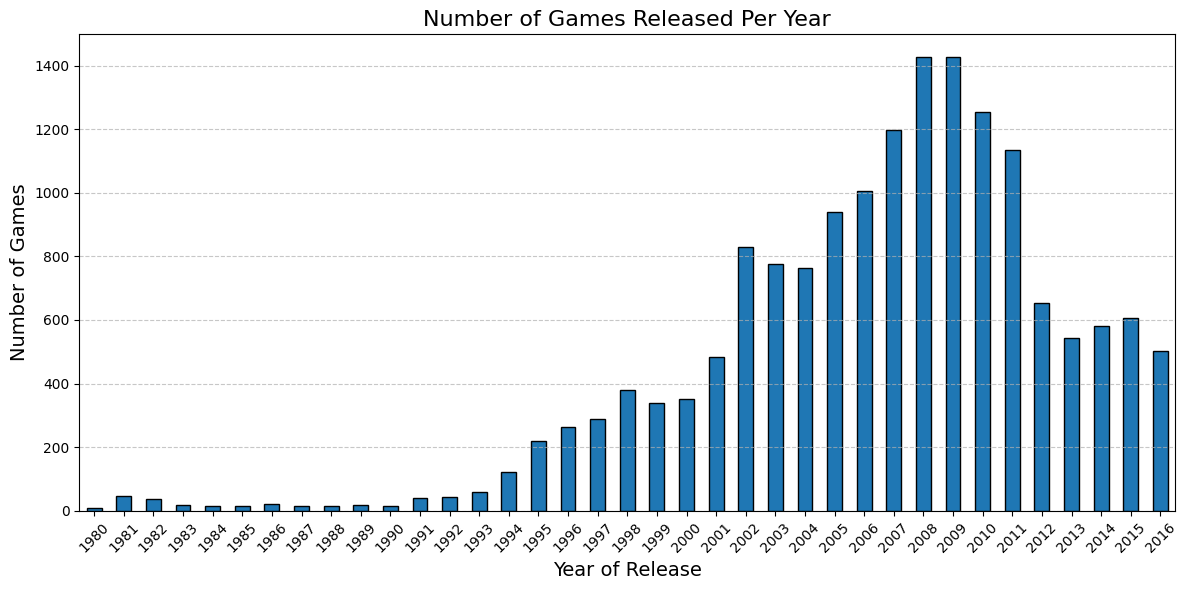

In [17]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', edgecolor='black')

plt.title('Number of Games Released Per Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

The most games were released per year between 2006 and 2011. Since 1994 there have been at least 100 games released per year, rising as the years went on but then start decreasing after the peak of 1,427 in 2008.

Time to group the data further by sorting what platforms had the most sales. 

In [18]:
rows_to_drop = df[
    (df['year_of_release'] == 1985) &
    (df['platform'] == 'DS')
].index

df = df.drop(index=rows_to_drop)

After processing the information before there was a clear outlier that after investigation must have been an error. It was a value indication there was a DS game sold in 1985 when the DS was not even released until 2004. This value was dropped as to help with accurate information as this outlier greatly skewed the results. 

In [19]:
sales_by_platform = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

sales_by_platform['total_global_sales'] = sales_by_platform.sum(axis=1)
top_platforms = sales_by_platform.sort_values(by='total_global_sales', ascending=False).head(5).index

df_top_platforms = df[df['platform'].isin(top_platforms)]

sales_distribution = df_top_platforms.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_distribution['total_global_sales'] = sales_distribution.sum(axis=1)

sales_distribution = sales_distribution.reset_index()

Time to visualize this better:

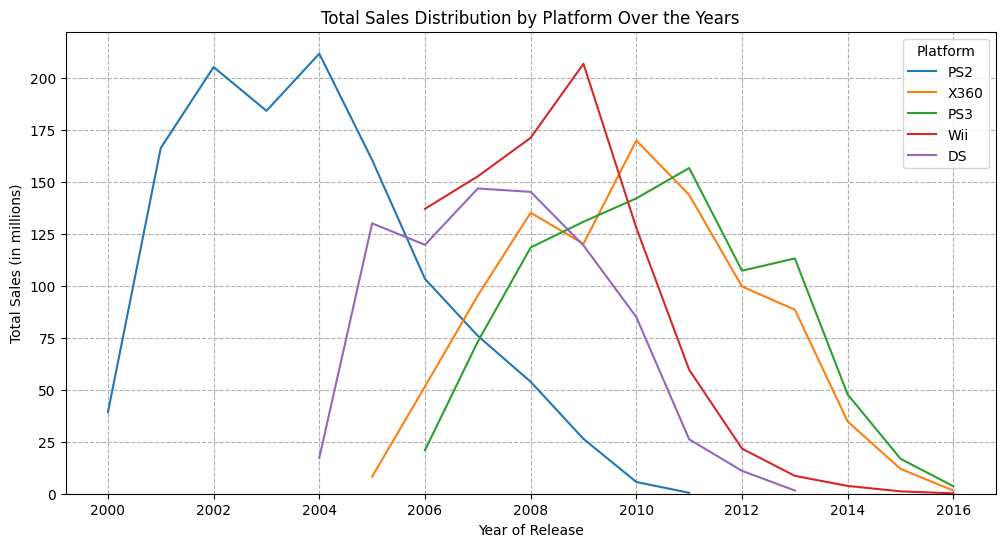

In [20]:
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_sales = sales_distribution[sales_distribution['platform'] == platform]
    plt.plot(platform_sales['year_of_release'], platform_sales['total_global_sales'], label=platform)

plt.title('Total Sales Distribution by Platform Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(linestyle='--')
plt.ylim(bottom=0)
plt.show()

Wow, look how quickly the Wii died off in sales after its peak in 2009. 

In [21]:
sales_by_platform

,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_global_sales
platform,,,,,,
2600,80.78,4.86,0.00,0.84,86.48,172.96
3DO,0.00,0.00,0.10,0.00,0.10,0.20
3DS,82.65,61.27,100.62,13.27,257.81,515.62
DC,5.43,1.69,8.56,0.27,15.95,31.90
DS,380.31,188.41,175.00,59.04,802.76,1605.52
GB,113.64,47.51,85.12,8.16,254.43,508.86
GBA,184.12,74.59,46.56,7.61,312.88,625.76
GC,131.94,38.32,21.34,5.13,196.73,393.46
GEN,21.05,6.05,2.67,0.97,30.74,61.48


In [22]:
df = df.dropna(subset=['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

platform_sales_by_year = df.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales_by_year['total_sales'] = platform_sales_by_year.sum(axis=1)


platform_sales_by_year = platform_sales_by_year.reset_index()
most_recent_year = platform_sales_by_year['year_of_release'].max()

previously_popular_platforms = platform_sales_by_year[
    (platform_sales_by_year['year_of_release'] < most_recent_year) & 
    (platform_sales_by_year['total_sales'] > 0)
]['platform'].unique()

zero_sales_recent = platform_sales_by_year[
    (platform_sales_by_year['year_of_release'] == most_recent_year) &
    (platform_sales_by_year['total_sales'] <1) &
    (platform_sales_by_year['platform'].isin(previously_popular_platforms))
]['platform']

declining_platforms = platform_sales_by_year[
    (platform_sales_by_year['platform'].isin(zero_sales_recent)) &
    (platform_sales_by_year['total_sales'] <1 )
]['platform'].unique()
print(f"The platforms that used to be popular and now have zero sales are: {declining_platforms}.")

The platforms that used to be popular and now have zero sales are: ['Wii'].


Looks like the Wii has declined in sales in recent years, which we saw on the previous chart.

In [23]:
df = df.dropna(subset=['year_of_release'])

platform_lifecycle = df.groupby('platform')['year_of_release'].agg(['min', 'max']).rename(columns={'min': 'first_year', 'max': 'last_year'})

platform_lifecycle['lifespan_years'] = platform_lifecycle['last_year'] - platform_lifecycle['first_year'] + 1

first_years = platform_lifecycle['first_year'].sort_values()
new_platform_intervals = first_years.diff().dropna()
unformatted_mean= platform_lifecycle['lifespan_years'].mean()
formatted_lifespan= f"The average lifespan of a platform is {unformatted_mean:.2f} years"
formatted_lifespan

'The average lifespan of a platform is 8.00 years'

It appears that the average lifespan for a platform is 8 years. 

Let's vizulize each platforms lifespan better:

In [24]:
sales_by_year = df.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_by_year['total_sales'] = sales_by_year.sum(axis=1)

most_recent_year = sales_by_year.index.max()
active_platforms = platform_lifecycle[platform_lifecycle['last_year'] >= most_recent_year - 1]
active_platforms

,first_year,last_year,lifespan_years
platform,,,
3DS,2011,2016,6
PC,1985,2016,32
PS3,2006,2016,11
PS4,2013,2016,4
PSP,2004,2015,12
PSV,2011,2016,6
Wii,2006,2016,11
WiiU,2012,2016,5
X360,2005,2016,12


Determined a relevent period of 2013 to 2016.

In [25]:
rdf = df[df['year_of_release'] >= 2013].reset_index(drop=True)
rdf.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Let's take a look at what platforms lead with sales after 2013:

In [26]:
sales_by_platform_rdf = rdf.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()
sales_by_platform_rdf['total_global_sales'] = sales_by_platform_rdf.sum(axis=1)
leading_platforms_rdf = sales_by_platform_rdf.sort_values(by='total_global_sales', ascending=False)

yearly_sales = rdf.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
yearly_sales['total_global_sales'] = yearly_sales.sum(axis=1)
yearly_sales = yearly_sales.reset_index()

recent_years = yearly_sales[yearly_sales['year_of_release'] >= yearly_sales['year_of_release'].max() - 3]
platform_growth = recent_years.groupby('platform')['total_global_sales'].sum()
platform_growth = platform_growth.sort_values(ascending=False)
platform_growth

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_global_sales, dtype: float64

Let's take a look at some overall variance and deviation for platform sales.

In [27]:
mean_var_std_platform_sales= sales_by_platform_rdf.agg(['mean','var','std']).reset_index()
mean_var_std_platform_sales

,index,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_global_sales
0,mean,39.791818,35.657273,12.798182,10.906364,99.153636,198.307273
1,var,1628.370716,1705.701062,407.157696,217.829805,9509.388885,38037.555542
2,std,40.353076,41.300134,20.178149,14.759058,97.516096,195.032191


Taking a quick look into leading platforms, sales and overall growth of platform sales. 

In [28]:
leading_platforms_rdf

,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_global_sales
platform,,,,,,
PS4,108.74,141.09,15.96,48.35,314.14,628.28
PS3,63.50,67.81,23.35,26.77,181.43,362.86
XOne,93.12,51.59,0.34,14.27,159.32,318.64
3DS,38.20,30.96,67.81,6.28,143.25,286.50
X360,81.66,42.52,0.51,12.11,136.80,273.60
WiiU,29.21,19.85,10.88,4.69,64.63,129.26
PC,11.11,25.36,0.00,2.96,39.43,78.86
PSV,5.04,6.10,18.59,3.26,32.99,65.98
Wii,6.56,5.93,0.05,1.12,13.66,27.32


In [29]:
yearly_sales

,year_of_release,platform,na_sales,eu_sales,jp_sales,other_sales,total_global_sales
0,2013,3DS,15.56,14.84,23.57,2.60,56.57
1,2013,DS,0.57,0.85,0.00,0.12,1.54
2,2013,PC,3.88,7.39,0.00,1.11,12.38
3,2013,PS3,41.45,42.27,12.13,17.40,113.25
4,2013,PS4,10.13,11.05,0.94,3.87,25.99
5,2013,PSP,0.00,0.17,2.93,0.04,3.14
6,2013,PSV,2.52,2.57,4.05,1.45,10.59
7,2013,Wii,4.48,3.34,0.05,0.72,8.59
8,2013,WiiU,9.85,6.70,3.57,1.53,21.65
9,2013,X360,53.36,27.03,0.43,7.76,88.58


In [30]:
platform_growth

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_global_sales, dtype: float64

Since 2013, platforms like PS4, X360, and Wii have led in global sales. Recently, PS4 and XOne have shown strong growth, while older platforms like PS3, X360, and Wii have declined. 

Just printed the array of the platforms within our set. 

In [31]:
rdf['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Visualizing the sales of platforms since 2013 better (first in a boxlplot then an organized bargraph):

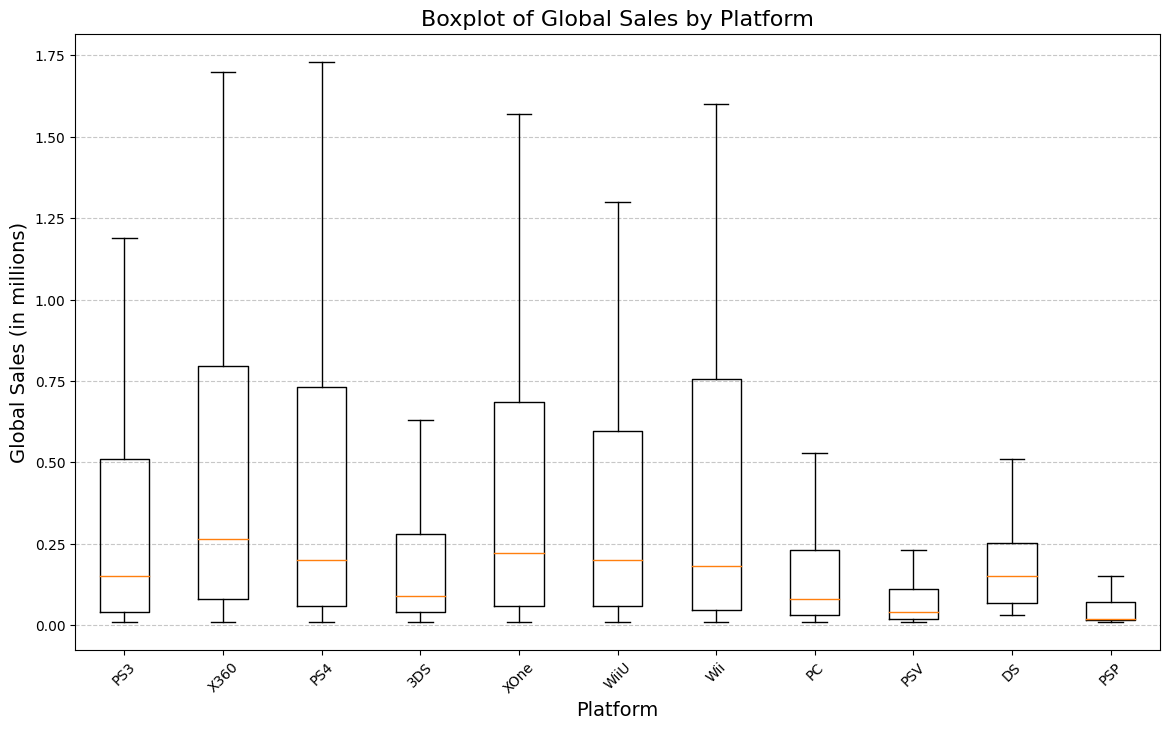

In [32]:
plt.figure(figsize=(14, 8))
plt.boxplot(
    [rdf[rdf['platform'] == platform]['total_sales'] for platform in rdf['platform'].unique()], showfliers=False
)
plt.title('Boxplot of Global Sales by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Global Sales (in millions)', fontsize=14)
plt.xticks(ticks=range(1, len(rdf['platform'].unique()) + 1), labels=rdf['platform'].unique(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

While the X360, PS4 and Wii are all fairly close together as far as sales globally, there is a significant difference in other platforms such as the PC, PSV and PSP, which are  greatly below the rest of the platforms in sales. 

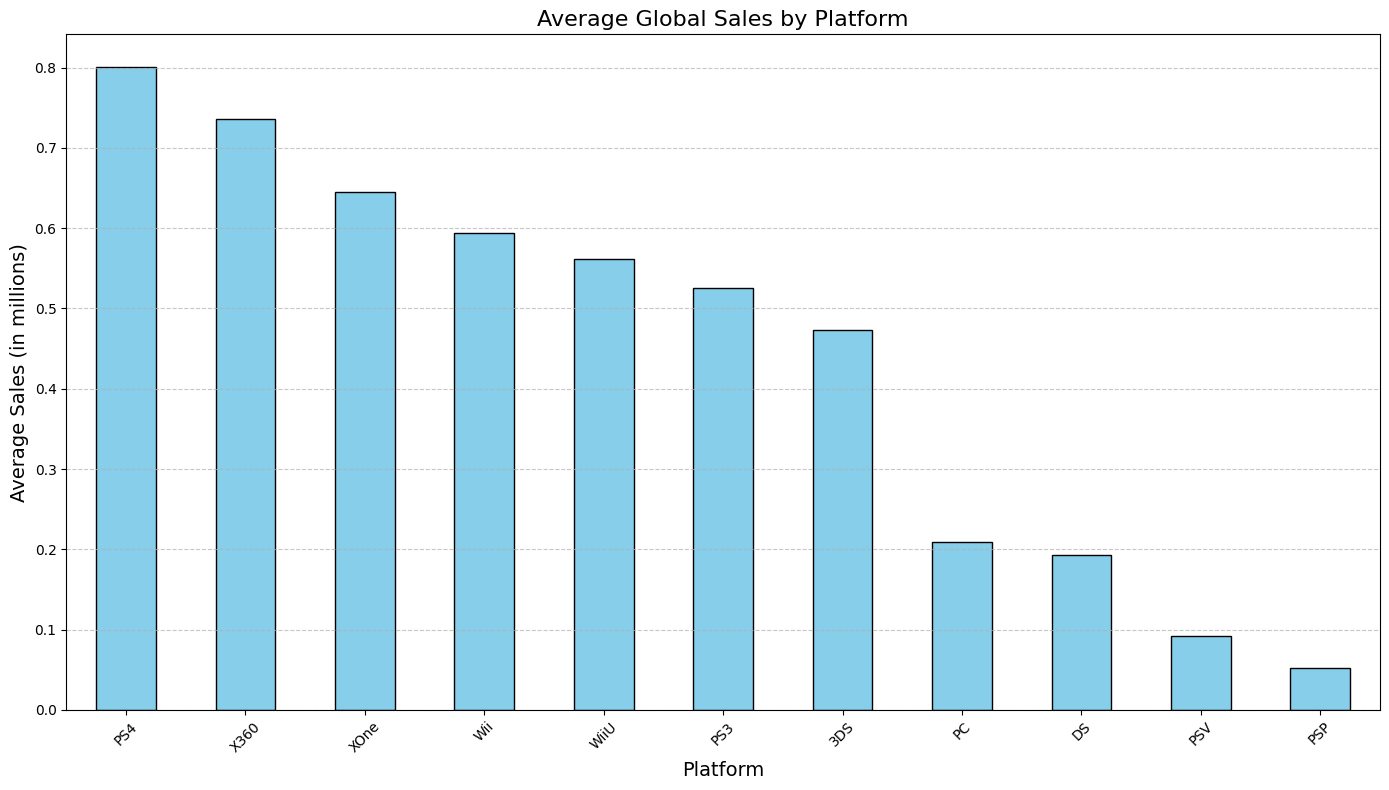

In [33]:
platform_avg_sales = rdf.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
platform_avg_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Global Sales by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Average Sales (in millions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
platform_avg_sales

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales, dtype: float64

There is a very significant difference in the sales between the top selling platform and the lowest selling platform. The PS4 being the top selling platform with over 0.8 million sales while PSP is the lowest selling platform with only 0.05 million sales. 

Let's focus on just the PS4, and visualize the affect of user and critic scores on sales of games.

In [35]:
ps4_data = rdf[rdf['platform'] == 'PS4']

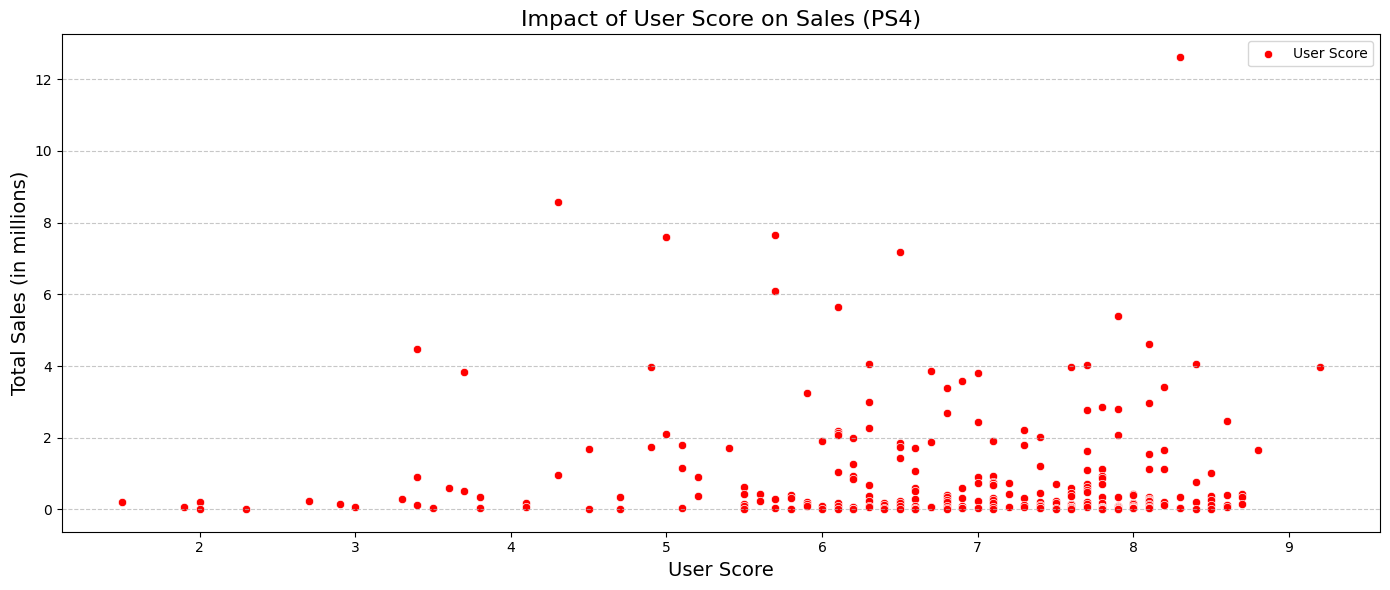

In [36]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, color='red', label='User Score')
plt.title('Impact of User Score on Sales (PS4)', fontsize=16)
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

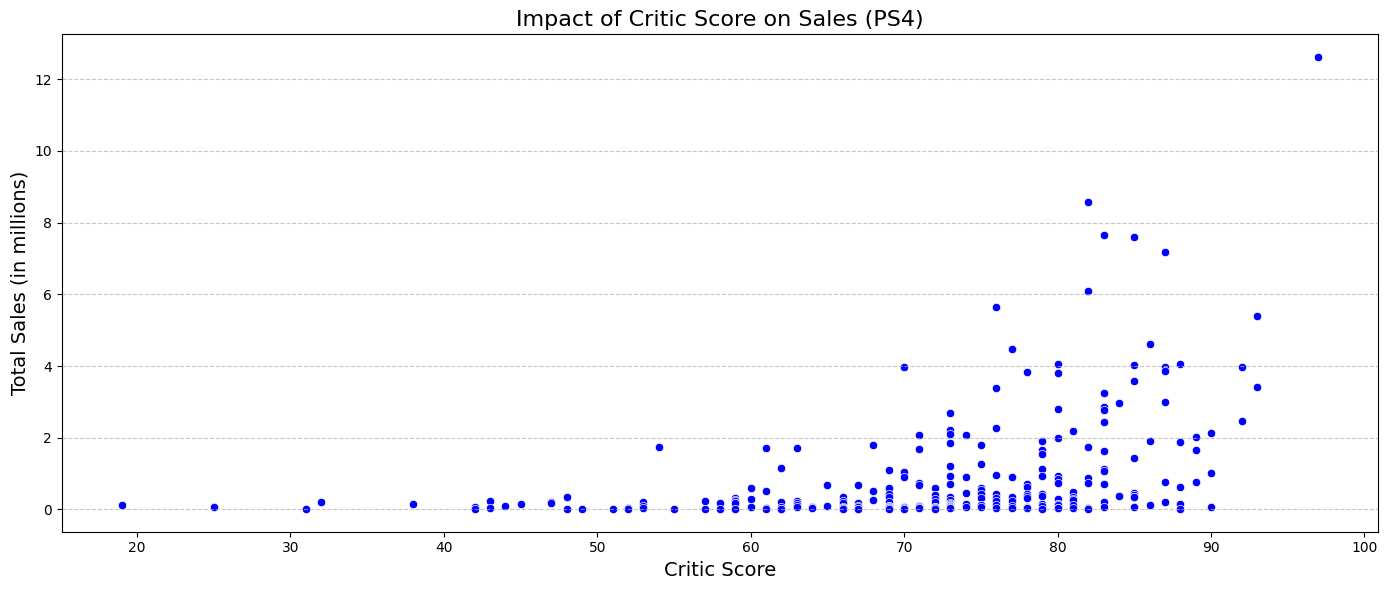

In [37]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, color='blue', label='Critic Score', legend=False)
plt.title('Impact of Critic Score on Sales (PS4)', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The trend shown is that the higher the user score or the higher the critic score the more sales for the game. Based of this data it appears many people are willing to spend the money on things that have higher ratings by users and/or professional critics.

Does this trend spread across all platforms or is it PS4 specific?

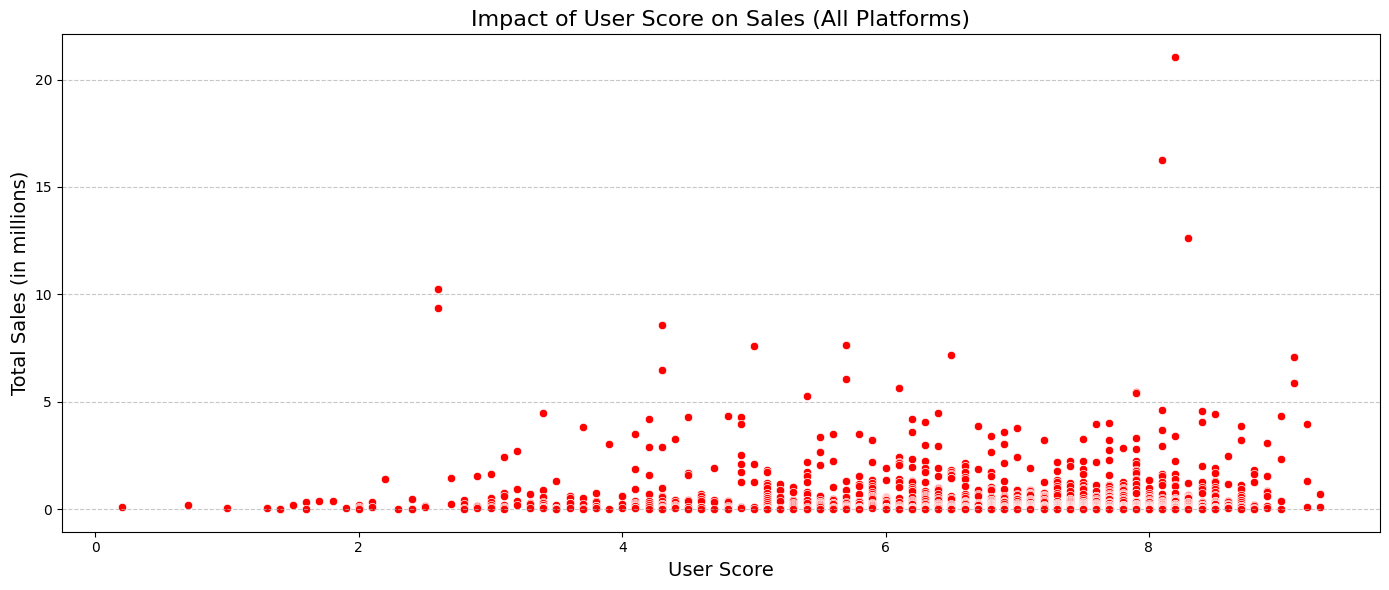

In [38]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='user_score', y='total_sales', data=rdf, color='red', label='User Score', legend=False)
plt.title('Impact of User Score on Sales (All Platforms)', fontsize=16)
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

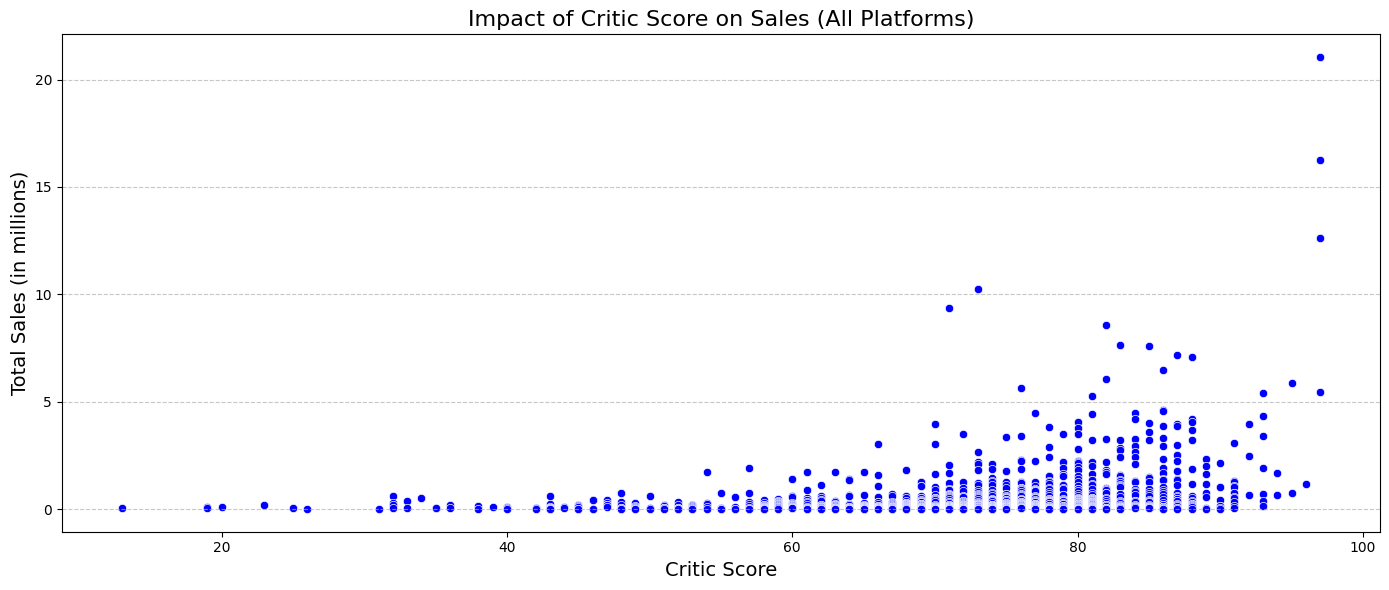

In [39]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=rdf, color='blue', label='Critic Score', legend=False)
plt.title('Impact of Critic Score on Sales (All Platforms)', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As a whole, the previous conclusion is solidified. The higher the score from users and/or critics the higher the sales of the game, regardless of the platform. 

In [40]:
correlation_critic = rdf['critic_score'].corr(rdf['total_sales'])
correlation_user = rdf['user_score'].corr(rdf['total_sales'])
print("Correlation between Critic Score and Total Sales:", correlation_critic)
print("Correlation between User Score and Total Sales:", correlation_user)

Correlation between Critic Score and Total Sales: 0.3136995151027369
Correlation between User Score and Total Sales: -0.0026078133545982727


How does genre affect sales?

In [41]:
genre_stats = rdf.groupby('genre').agg(
    total_games=('name', 'count'),
    total_sales=('total_sales', 'sum'),
    average_sales=('total_sales', 'mean'),
    median_sales=('total_sales', 'median')
).sort_values(by='total_sales', ascending=False)

In [42]:
genre_stats

,total_games,total_sales,average_sales,median_sales
genre,,,,
Action,766,321.87,0.420196,0.110
Shooter,187,232.98,1.245882,0.450
Sports,214,150.65,0.703972,0.240
Role-Playing,292,145.89,0.499623,0.125
Misc,155,62.82,0.405290,0.100
Platform,74,42.63,0.576081,0.225
Racing,85,39.89,0.469294,0.120
Fighting,80,35.31,0.441375,0.125
Adventure,245,23.64,0.096490,0.030


Shooter games excel in average and median sales per game, showing strong performance from fewer titles. Action games lead in total sales but rely on having many titles rather than high sales per game. Sports and Role-Playing games also perform well, with Sports achieving slightly better average and median sales. Niche genres like Simulation, Strategy, and Puzzle have lower overall sales but cater to dedicated audiences. Overall, while Action games dominate in total sales, Shooter and Sports games are more efficient in driving revenue per title.

# Create a user profile for each region

Let's find out what regions sell the most games per platform.

In [43]:
top_platforms_na_sales = rdf.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_na_sales

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [44]:
top_platforms_eu_sales = rdf.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu_sales

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [45]:
top_platforms_jp_sales = rdf.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp_sales

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

The PS4 is the top seller for both North American sales and Europe sales, while the top seller for Japan is the 3DS. North Americanand Europe sales are very similar overall for the top five platforms; both having the same platforms in the top five but in different spots. Japan varies as they do not have either Xbox (360 or one) but instead has the WiiU and PSV. 

What regions sell more of what genre?

In [46]:
top_genres_na_sales = rdf.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_na_sales

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [47]:
top_genres_eu_sales = rdf.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu_sales

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [48]:
top_genres_jp_sales = rdf.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp_sales

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In North America and Europe, Action, Shooter, and Sports genres dominate sales, with Action leading in both regions. In Japan, Role-Playing games are the top genre, followed by Action. Japan also prefers Fighting and Misc genres, showing distinct regional preferences compared to the West.

Does the rating of the game affect the sales based on region?

In [49]:
rating_sales = rdf.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

rating_sales_percentage = rating_sales.div(rating_sales.sum()) * 100
rating_sales_percentage

,na_sales,eu_sales,jp_sales
rating,,,
E,22.696603,26.605387,27.166697
E10+,15.573229,13.625048,10.568814
M,47.434609,46.380697,25.318500
T,14.295558,13.388868,36.945990


Games rated E (Everyone) sell the most in all regions, especially in Japan. M (Mature) games are more popular in North America and Europe, while Japan prefers T (Teen) games. E10+ games do okay everywhere. Early childhood and unrated games hardly sell at all. Yes, the ratings do affect the sales per region. 

# Test the following hypotheses:

First hypothesis: Average user ratings of the Xbox One and PC platforms are the same. 

In [50]:
xbox_pc_data = rdf[rdf['platform'].isin(['XOne', 'PC'])]

xbox_scores = xbox_pc_data[xbox_pc_data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = xbox_pc_data[xbox_pc_data['platform'] == 'PC']['user_score'].dropna()

In [51]:
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means are not significantly different.")

Fail to reject the null hypothesis. The means are not significantly different.


Second hypothesis: Average user ratings for the Action and Sports genres are different.

In [52]:
action_sports_data = rdf[rdf['genre'].isin(['Action', 'Sports'])].copy()

action_scores = action_sports_data[action_sports_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = action_sports_data[action_sports_data['genre'] == 'Sports']['user_score'].dropna()

In [53]:
t_stat_asd, p_value_asd = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means are not significantly different.")

Fail to reject the null hypothesis. The means are not significantly different.


For the hypothesis testing, we examined two key scenarios. The first tested whether the average user ratings for Xbox One and PC games are the same. The null hypothesis (H0) stated that the ratings are equal, while the alternative hypothesis (H1) suggested they are different. The second test compared average user ratings between the Action and Sports genres, with (H0) assuming equality and (H1) proposing a difference. We used independent two-sample t-tests for both scenarios because they are suitable for comparing the means of two independent groups with continuous data. Welch's t-test was applied to account for potential variance differences. A significance level (𝛼=0.05) was chosen as a standard threshold to balance the risks of Type I and Type II errors, ensuring more reliable results overall.

The hypothesis testing revealed important insights, such as differences in user ratings between platforms and genres. These findings show that factors like platform and genre can influence user preferences. By using appropriate statistical tests, we ensured reliable results, providing a better understanding of what affects video game performance.

# Write a general conclusion

This analysis revealed key factors influencing video game sales, highlighting the dominance of platforms, genres, and age ratings, with notable regional variations. Platforms like PS4, X360, and DS lead globally, while genres such as Action, Role-Playing, and Sports attract the most attention. Age ratings also play a role, with "E" (Everyone) rated games dominating across regions. In North America, platforms like X360 and PS4 excel, with Action and Sports games being most popular, while Europe shows similar trends with added PC prominence. Japan favors DS and 3DS platforms, with Role-Playing and Action genres standing out. To optimize success, companies should prioritize platform-specific strategies, focus on regional genre preferences, and align age ratings to consumer interests, such as "M" (Mature) games in the West and "T" (Teen) games in Japan. High-quality games with strong user and critic reviews remain essential, as positive ratings are strongly linked to higher sales. Additionally, investing in emerging trends like digital distribution, subscription models, and streaming platforms will ensure competitiveness in the evolving gaming industry. By leveraging these insights, companies can effectively target markets, maximize sales, and stay ahead in a dynamic marketplace.